# **Imports**

In [ ]:
import numpy as np
import pandas as pd

# Accuracy calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error
# To Convert Categorical column values to numeric values
from sklearn.preprocessing import LabelEncoder

# to split the dataset into train and testing sets
from sklearn.model_selection import train_test_split

# Gradient Descent Library
from sklearn.linear_model import SGDRegressor

# Library for Linear Regression Model
from sklearn.linear_model import LinearRegression

# Library for Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures

# For visualizing the relationship between the model degree and RMSE.
import matplotlib.pyplot as plt

# from category_encoders import TargetEncoder


# **1) Prepare Data**

In [ ]:
# Load the training and test data
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
# Concatenate the train_data and test_data to ensure that LabelEncoder is consistent between the two datasets
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [ ]:
# Modify the entire column "name" so that it only holds the first word of the name, which is the car modal
combined_data['name'] = combined_data['name'].fillna('').astype(str).str.split().str[0]

In [ ]:
combined_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
12463,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
12464,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
12465,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
12466,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
# Convert all categorical column values to numeric values
le=LabelEncoder()
combined_data["name"]            = le.fit_transform(combined_data["name"])
combined_data["fuel"]            = le.fit_transform(combined_data["fuel"])
combined_data["seller_type"]     = le.fit_transform(combined_data["seller_type"])
combined_data["transmission"]    = le.fit_transform(combined_data["transmission"])
combined_data["owner"]           = le.fit_transform(combined_data["owner"])

In [ ]:
# Split the train and test data back into their old sets
train_data = combined_data[:len(train_data)] # 8128 columns
test_data = combined_data[len(train_data):]   # 4340

In [ ]:
# Set the Features name, year, km_driven, fuel, seller_type, transmission, owner as X
# Set the Label selling_price as Y
X_train = train_data.drop('selling_price', axis=1)
y_train = train_data['selling_price'].values.reshape(-1, 1)

In [ ]:
X_test = test_data.drop('selling_price', axis=1)
y_test = test_data['selling_price'].values.reshape(-1, 1)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


8128
8128
4340
4340


# **2) Linear Regression**

## Multi feature Equation


In [ ]:
# Add a column of ones to X_train for the beta0 (bias) term (intercept)
X_tilda = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)

In [ ]:
# Calculate the beta coefficients using the matrix-based approach
betas = np.linalg.inv(X_tilda.T @ X_tilda) @ X_tilda.T @ y_train

In [ ]:
# Now you can make predictions on the test set
# First, prepare the test set by adding the beta0 (bias) term as well
X_test_tilda = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

In [ ]:
# Make predictions
# calculate predictions by multiplying the test data (with the bias term) by the beta coefficients.
y_pred = X_test_tilda @ betas

In [ ]:
# Calculating the residual errors
residual_errors = y_test - y_pred
# print(y_test)
# print(y_pred)
residual_errors = y_test - y_pred

print(residual_errors)

[[ 107059.90923762]
 [ 165469.52146816]
 [  52638.84308501]
 ...
 [  94715.49764775]
 [ 126820.75343685]
 [-119901.60815164]]


In [ ]:
# Calculate evaluation metrics (RMSE, MSE, MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

RMSE: 477644.54338617116
MSE: 228144309826.58392
MAE: 305309.9548087045


## Gradient Descent Approach



In [ ]:
# Reinitialize X_train data
X_train = X_train = train_data.drop('selling_price', axis=1)
# Change the Y_train dataset back to 1D because the SGDRegressorw expects the target variable (y_train and y_test) to be a 1D array.
y_train = train_data['selling_price'].values

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8128
8128
4340
4340


In [ ]:
# Create and configure the SGDRegressor
sgd_regressor = SGDRegressor(
    loss = 'squared_error',  # Specify the loss function for linear regression (squared error loss function)
    max_iter = 1000000000,  # Number of iterations
    tol = 0.00000000000001,  # IF change in the cost function is less than tol, we stop the optimization. we reached the min
    learning_rate = 'constant',  # Use a constant learning rate
    eta0 = 0.00000000000001  # Initial learning rate ( the step for each iteration in the optimization process)
)

In [ ]:
# Fit the model to the training data
sgd_regressor.fit(X_train, y_train)

SGDRegressor(eta0=1e-14, learning_rate='constant', max_iter=1000000000,
             tol=1e-14)

In [ ]:
# Make predictions on the test data
y_pred = sgd_regressor.predict(X_test)

In [ ]:
# Calculating the residual errors
residual_errors = y_test - y_pred
# print(y_test)
# print(y_pred)
print(residual_errors)

[[-491510.17478105 -518820.18879497 -452134.83636809 ... -474403.29722101
  -467079.42179847 -535393.65571328]
 [-416510.17478105 -443820.18879497 -377134.83636809 ... -399403.29722101
  -392079.42179847 -460393.65571328]
 [  48489.82521895   21179.81120503   87865.16363191 ...   65596.70277899
    72920.57820153    4606.34428672]
 ...
 [-441510.17478105 -468820.18879497 -402134.83636809 ... -424403.29722101
  -417079.42179847 -485393.65571328]
 [ 313489.82521895  286179.81120503  352865.16363191 ...  330596.70277899
   337920.57820153  269606.34428672]
 [-326510.17478105 -353820.18879497 -287134.83636809 ... -309403.29722101
  -302079.42179847 -370393.65571328]]


In [ ]:
# Calculate evaluation metrics (RMSE, MSE, MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Gradient Descent Results (using scikit-learn SGDRegressor):")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

Gradient Descent Results (using scikit-learn SGDRegressor):
RMSE: 571774.2065189012
MSE: 326925743240.31903
MAE: 336336.55593229784


## Gradient Descent (Manually)

In [ ]:
# Reinitialize Data
train_data = combined_data[:len(train_data)] # 8128 columns
test_data = combined_data[len(train_data):]   # 4340

X_train = X_train = train_data.drop('selling_price', axis=1).values
# Change the Y_train dataset back to 1D because the SGDRegressorw expects the target variable (y_train and y_test) to be a 1D array.
y_train = train_data['selling_price'].values

X_test = test_data.drop('selling_price', axis=1).values
y_test = test_data['selling_price'].values

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8128
8128
4340
4340


In [ ]:
# Standardize the features

# The X_train data is standardized by subtracting the mean of each feature from
# its values and then dividing by the standard deviation. This standardization
# ensures that all features have a mean of 0 and a standard deviation of 1.
# It's essential for gradient descent to work effectively, especially when
# features have different scales.

X_train = (X_train - X_train.mean()) / X_train.std()

In [ ]:
# A column of 1s is added to the feature matrix X_train.
# This column is used to represent the intercept term in the linear regression model.
# The intercept term allows the model to have a non-zero value when all the features are zero,
# capturing the bias or baseline behavior of the target variable.

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train)) # Add a column of 1s for the intercept term

In [ ]:
# Initialize parameters
alpha = 0.0000000001  # The learning rate, controlling the step size in each iteration.
iterations = 9580
m = y_train.shape[0]
theta = np.random.rand(X_train.shape[1]) # Initialize theta with random values

In [ ]:
def gradient_descent_multi(x, y, theta, iterations, alpha):
    past_costs = [] # To store the cost at each iteration
    past_thetas = [theta] # To store the theta values at each iteration

    for i in range(iterations):
        # Step 1: Calculate predictions
        prediction = np.dot(x, theta)

        # Step 2: Calculate the error
        error = prediction - y

        # Step 3: Calculate the cost (mean squared error)
        cost = 1 / (2 * m) * np.dot(error.T, error)
        past_costs.append(cost)

        # Step 4: Update theta (model parameters)
        theta = theta - (alpha * (1 / m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs

In [ ]:
past_thetas, past_costs = gradient_descent_multi(X_train, y_train, theta, iterations, alpha)
theta = past_thetas[-1]
print(theta)

# Print the results
print("Gradient Descent:")
for i, coef in enumerate(theta):
    print(f"theta_{i}: {coef:.2f}")

[ 1.13369456  0.41481625 -0.0797512   1.64349657  0.66267294  0.69706834
  0.60869395  0.76917241]
Gradient Descent:
theta_0: 1.13
theta_1: 0.41
theta_2: -0.08
theta_3: 1.64
theta_4: 0.66
theta_5: 0.70
theta_6: 0.61
theta_7: 0.77


In [ ]:
# Calculate predictions for the test data
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))  # Add a column of 1s for the intercept
y_pred = np.dot(X_test, theta)

In [ ]:
# Calculate residual errors
residual_errors = y_test - y_pred
print(residual_errors)

[-54898.08585667  52971.84558223 435803.13710605 ... -26264.92013438
 717238.42183029 159404.62534869]


In [ ]:
# Calculate evaluation metrics (RMSE, MSE, MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Gradient Descent Results:")
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

Gradient Descent Results:
RMSE: 716904.3836420564
MSE: 513951895285.1968
MAE: 415361.5025397273


## **Trying to find the minimum iteration value**

In [ ]:
rmseArray = {}

for i in range(1000, 10001, 10):

    # Reinitialize Data
    train_data = combined_data[:len(train_data)] # 8128 columns
    test_data = combined_data[len(train_data):]   # 4340

    X_train = X_train = train_data.drop('selling_price', axis=1).values
    # Change the Y_train dataset back to 1D because the SGDRegressorw expects the target variable (y_train and y_test) to be a 1D array.
    y_train = train_data['selling_price'].values

    X_test = test_data.drop('selling_price', axis=1).values
    y_test = test_data['selling_price'].values

    X_train = (X_train - X_train.mean()) / X_train.std()

    X_train = np.column_stack((np.ones(X_train.shape[0]), X_train)) # Add a column of 1s for the intercept term



    # Initialize parameters 000000001 10000
    alpha = 0.0000000001  # The learning rate, controlling the step size in each iteration.
    iterations = i
    m = y_train.shape[0]
    theta = np.random.rand(X_train.shape[1]) # Initialize theta with random values


    past_thetas, past_costs = gradient_descent_multi(X_train, y_train, theta, iterations, alpha)
    theta = past_thetas[-1]
    # print(theta)


    # # Print the results
    # print("Gradient Descent:")
    # for i, coef in enumerate(theta):
    #     print(f"theta_{i}: {coef:.2f}")


    # Calculate predictions for the test data
    X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))  # Add a column of 1s for the intercept
    y_pred = np.dot(X_test, theta)


    # Calculate residual errors
    residual_errors = y_test - y_pred

    # Calculate evaluation metrics (RMSE, MSE, MAE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    if rmse < 730000:
        rmseArray[i] = rmse

    if rmse < 500000:
        break

In [ ]:
print(rmseArray)
min_key = min(rmseArray, key=lambda k: rmseArray[k])
min_value = rmseArray[min_key]

print("Minimum key:", min_key)
print("Minimum value:", min_value)

{1530: 729815.2945020339, 1930: 728679.0482467787, 2010: 728598.8468211241, 2400: 728658.4758244819, 2550: 729475.561846338, 2610: 729239.3238194933, 2620: 728992.7106616629, 2680: 729038.1675180878, 2690: 729657.2079690795, 2830: 729317.3058431195, 2870: 729567.673548489, 2890: 727365.3142424768, 2970: 728789.5426146722, 2980: 728680.7127900433, 3010: 728556.9511374705, 3050: 726967.7736108217, 3110: 727262.2246686261, 3150: 727899.2759503878, 3210: 729570.9132790933, 3320: 728748.1696270433, 3330: 726953.8366468594, 3430: 728471.179860085, 3450: 727200.5337854285, 3470: 727530.6091078529, 3480: 726987.187449146, 3520: 728474.7986707684, 3600: 725938.2996152296, 3660: 728280.8448763503, 3760: 729936.446136841, 3800: 728154.1638115156, 3810: 728054.0273961192, 3820: 728049.0199224922, 3830: 729047.0392959253, 3880: 727715.7079581292, 3980: 728440.1150656922, 4010: 726115.450098959, 4020: 724436.8923655361, 4150: 726258.7396166276, 4170: 728884.5011243896, 4270: 727943.485600751, 4340: 

# **2) Polynomial Regression**

## For Degree 2 as an example


In [ ]:
# We keep the Y also as a 1D array, for the same reason as the Gradient Descent Model
X_train = train_data.drop('selling_price', axis=1)
y_train = train_data['selling_price']

X_test = test_data.drop('selling_price', axis=1)
y_test = test_data['selling_price']

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8128
8128
4340
4340


In [ ]:
# Use the sklearn functions LinearRegression and PolynomialFeatures to create a model

# Transform the features to Polynomial Features of Degree = 2
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
print(X_poly)

# Create a Linear Regression Model that will train on the Polynomial Features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

[[1.000e+00 2.000e+01 2.014e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.800e+01 2.014e+03 ... 1.000e+00 2.000e+00 4.000e+00]
 [1.000e+00 1.000e+01 2.006e+03 ... 1.000e+00 4.000e+00 1.600e+01]
 ...
 [1.000e+00 2.000e+01 2.009e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.900e+01 2.013e+03 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 2.900e+01 2.013e+03 ... 1.000e+00 0.000e+00 0.000e+00]]


LinearRegression()

In [ ]:
# Make predictions on the test set
X_test_poly = poly_reg.transform(X_test)
y_pred = lin_reg.predict(X_test_poly)

In [ ]:
# Calculate RMSE for the chosen degree
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(f"RMSE: {rmse}")


RMSE: 445876.5468156293


## For Degrees from 1 - 10 (using a for loop)


In [ ]:
degrees = list(range(1, 11))  # Degrees from 1 to 10
rmse_values = []
residual_errors = []

In [ ]:
for degree in degrees:
    # Transform the features to Polynomial Features of the current degree
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_train)

    # Create a Linear Regression Model that will train on the Polynomial Features
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)

    # Make predictions on the test set
    X_test_poly = poly_reg.transform(X_test)
    y_pred = lin_reg.predict(X_test_poly)
    res_error = y_test - y_pred

    # Calculate RMSE for the current degree
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_values.append(rmse)
    residual_errors.append(res_error)

In [ ]:
# RESULTS
# [517944.6411044948, 422754.3750149545, 409671.8820524619, 675229.785650757, 1123881.4083380792, 7696632.964348295, 18406265.303462625, 29028029.340814497, 2013191.8916789212, 9361718.52750563]

# Latest results
# [477644.54338648054, 445876.5468156293, 463478.38374755846, 1887634.827393363, 14326955.172228932, 103731316.77588017, 278915876.34653115, 32022454.408754416, 65172658.70153228, 101001206.21485832]



# [1606      89674.302703
# 198       11032.170306
# 5722      30950.118116
# 3525     456389.391095
# 4662    -134809.259231
#              ...
# 10112      7928.993066
# 3966    -119871.712199
# 7294    -123598.750735
# 4560     140415.913103
# 3430    -102018.518843
# Name: selling_price, Length: 3741, dtype: float64, 1606     257603.095330
# 198      -73735.105931
# 5722     209632.394403
# 3525    -265415.991307
# 4662    -266868.021970
#              ...
# 10112    -27241.137578
# 3966    -112400.507728
# 7294      46461.250150
# 4560     179778.153565
# 3430      93481.606391
# Name: selling_price, Length: 3741, dtype: float64, 1606     336400.665028
# 198      -36739.650966
# 5722      65721.052442
# 3525     116031.837108
# 4662    -189289.311573
#              ...
# 10112    100298.111608
# 3966    -286983.699099
# 7294    -162836.217469
# 4560     129408.670652
# 3430     -53237.751066
# Name: selling_price, Length: 3741, dtype: float64, 1606     148494.188572
# 198      106950.573480
# 5722      26726.674777
# 3525    -258594.359868
# 4662     -55076.009558
#              ...
# 10112    186576.317386
# 3966     320125.149158
# 7294     175022.769932
# 4560     215134.053491
# 3430      -6477.460642
# Name: selling_price, Length: 3741, dtype: float64, 1606    -2.478479e+05
# 198     -4.634210e+05
# 5722    -1.196587e+05
# 3525    -6.829532e+05
# 4662     1.155268e+06
#              ...
# 10112   -7.486775e+05
# 3966    -1.638311e+06
# 7294     1.678084e+06
# 4560    -7.206994e+04
# 3430    -4.431763e+05
# Name: selling_price, Length: 3741, dtype: float64, 1606     353887.220860
# 198     -653283.562963
# 5722     258021.019510
# 3525      66746.817226
# 4662      22136.948234
#              ...
# 10112   -562541.904271
# 3966    -800789.839350
# 7294     244837.474350
# 4560    -656382.368867
# 3430     -64733.681979
# Name: selling_price, Length: 3741, dtype: float64, 1606       5155.969891
# 198     -244493.558157
# 5722    -164877.472455
# 3525     122150.148896
# 4662      44045.321278
#              ...
# 10112   -557332.705528
# 3966    -335757.177113
# 7294     239221.388549
# 4560    -215331.889279
# 3430    -222997.770910
# Name: selling_price, Length: 3741, dtype: float64, 1606     -48477.681553
# 198      -96947.098064
# 5722    -276066.555441
# 3525     136195.448155
# 4662    -114824.744256
#              ...
# 10112   -441410.880764
# 3966    -186948.136854
# 7294     141679.729732
# 4560     -66947.859241
# 3430    -154167.915460
# Name: selling_price, Length: 3741, dtype: float64, 1606     -52030.495777
# 198      -86817.461641
# 5722    -292151.264271
# 3525     143183.067539
# 4662    -114698.781320
#              ...
# 10112   -431698.680261
# 3966    -176817.478496
# 7294     145678.923583
# 4560     -56817.474690
# 3430    -146261.293909
# Name: selling_price, Length: 3741, dtype: float64, 1606     -49227.476034
# 198      -79431.399584
# 5722    -298630.170630
# 3525     150754.519709
# 4662    -108656.742658
#              ...
# 10112   -424430.231256
# 3966    -169431.400842
# 7294     150874.875397
# 4560     -49431.400816
# 3430    -139420.780017
# Name: selling_price, Length: 3741, dtype: float64]


In [ ]:
# Print or save the RMSE values
for degree, rmse in zip(degrees, rmse_values):
    print(f"Degree {degree} RMSE: {rmse}")

Degree 1 RMSE: 477644.54338648054
Degree 2 RMSE: 445876.5468156293
Degree 3 RMSE: 463478.38374755846
Degree 4 RMSE: 1887634.827393363
Degree 5 RMSE: 11550740.886296831
Degree 6 RMSE: 103731316.77588017
Degree 7 RMSE: 278915876.34653115
Degree 8 RMSE: 32022454.408754416
Degree 9 RMSE: 65172658.70153228
Degree 10 RMSE: 101001206.21485832


### Printing all residual error lists for each iteration and calculating the mean to represent one list for one iteration

In [ ]:
print(residual_errors[0])

residual_series = pd.Series(residual_errors[0])
mean_residual = residual_series.mean()
print(mean_residual)


8128     107059.909232
8129     165469.521462
8130      52638.843084
8131    -266356.954957
8132    -142707.679874
             ...      
12463   -227080.708324
12464   -227080.708324
12465     94715.497643
12466    126820.753437
12467   -119901.608159
Name: selling_price, Length: 4340, dtype: float64
-93858.7701969853


In [ ]:
print(residual_errors[1])

residual_series = pd.Series(residual_errors[1])
mean_residual = residual_series.mean()
print(mean_residual)

8128     -82607.975998
8129      12706.383476
8130     250674.624966
8131    -199114.288060
8132      27279.799852
             ...      
12463    -28941.728758
12464    -28941.728758
12465    -27380.533383
12466    229394.653403
12467   -236086.328348
Name: selling_price, Length: 4340, dtype: float64
-53819.9903947973


In [ ]:
print(residual_errors[2])

residual_series = pd.Series(residual_errors[2])
mean_residual = residual_series.mean()
print(mean_residual)


8128      14056.302265
8129     130429.825251
8130     181922.792006
8131     -77613.367621
8132     -76154.102700
             ...      
12463    -79549.687444
12464    -79549.687444
12465   -142303.861016
12466    215483.919898
12467   -171118.532224
Name: selling_price, Length: 4340, dtype: float64
-60218.635060806046


In [ ]:
print(residual_errors[3])

residual_series = pd.Series(residual_errors[3])
mean_residual = residual_series.mean()
print(mean_residual)

8128      -9718.318431
8129     165112.251548
8130     249261.358926
8131    -364171.874418
8132     154935.624378
             ...      
12463    -29652.359903
12464    -29652.359903
12465    -95416.974073
12466    340051.635791
12467   -232272.863384
Name: selling_price, Length: 4340, dtype: float64
-53228.57727771867


In [ ]:
print(residual_errors[4])

residual_series = pd.Series(residual_errors[4])
mean_residual = residual_series.mean()
print(mean_residual)

8128    -290975.062307
8129    -107839.117863
8130     278111.755222
8131    -629823.418823
8132     677375.410315
             ...      
12463    301995.410512
12464    301995.410512
12465   -172441.235172
12466    361042.314815
12467   -335871.117927
Name: selling_price, Length: 4340, dtype: float64
-348357.1666055197


In [ ]:
print(residual_errors[5])

residual_series = pd.Series(residual_errors[5])
mean_residual = residual_series.mean()
print(mean_residual)

8128    -448179.738368
8129    -573881.210418
8130     202847.822023
8131    -487818.039026
8132     328258.155424
             ...      
12463    -81732.190075
12464    -81732.190075
12465   -235262.622966
12466    395316.796934
12467   -577976.490919
Name: selling_price, Length: 4340, dtype: float64
1891374.5469480802


In [ ]:
print(residual_errors[6])

residual_series = pd.Series(residual_errors[6])
mean_residual = residual_series.mean()
print(mean_residual)

8128    -591530.561678
8129    -627891.435388
8130     167288.027901
8131    -527348.729039
8132     290214.515765
             ...      
12463   -164333.586512
12464   -164333.586512
12465   -444917.171276
12466    361409.060350
12467   -576571.008655
Name: selling_price, Length: 4340, dtype: float64
4835125.142791794


In [ ]:
print(residual_errors[7])

residual_series = pd.Series(residual_errors[7])
mean_residual = residual_series.mean()
print(mean_residual)

8128    -595554.187405
8129    -523360.310554
8130     -41233.109826
8131    -408584.975911
8132    -136397.190306
             ...      
12463   -242903.227104
12464   -242903.227104
12465   -541620.766678
12466    217072.413187
12467   -433827.277539
Name: selling_price, Length: 4340, dtype: float64
-702126.4094422878


In [ ]:
print(residual_errors[8])

residual_series = pd.Series(residual_errors[8])
mean_residual = residual_series.mean()
print(mean_residual)


8128    -586901.210507
8129    -512369.315501
8130     -43392.114673
8131    -397398.074275
8132    -173218.852086
             ...      
12463   -236324.180818
12464   -236324.180818
12465   -536062.756958
12466    219825.695661
12467   -422426.533974
Name: selling_price, Length: 4340, dtype: float64
952370.3318780735


In [ ]:
print(residual_errors[9])

residual_series = pd.Series(residual_errors[9])
mean_residual = residual_series.mean()
print(mean_residual)

8128    -582376.692610
8129    -507431.756828
8130     -41736.843233
8131    -392434.325035
8132    -185772.916167
             ...      
12463   -232278.164092
12464   -232278.164092
12465   -532245.508824
12466    222913.429065
12467   -417436.736016
Name: selling_price, Length: 4340, dtype: float64
-1800296.0681096676


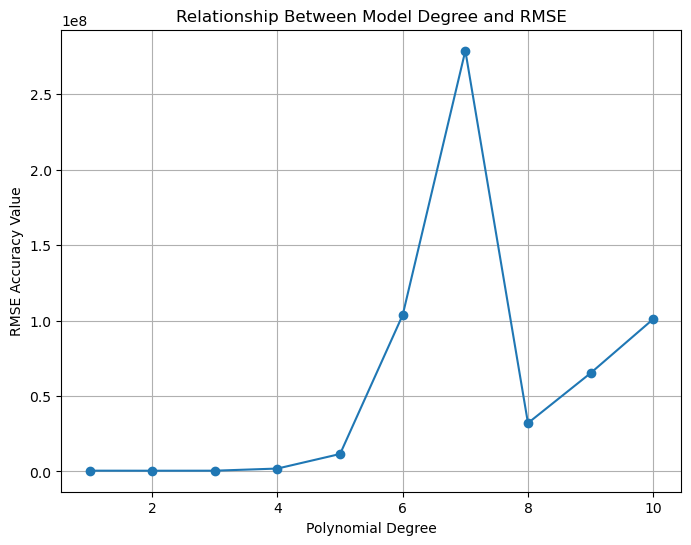

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, rmse_values, marker='o', linestyle='-')
plt.title('Relationship Between Model Degree and RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE Accuracy Value')
plt.grid(True)
plt.show()